In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 3A3B-B1C3

 Directory of C:\Users\Dell\EXCELR\Resume Classification NLP Project

15-03-2023  20:26    <DIR>          .
08-03-2023  13:01    <DIR>          ..
05-03-2023  22:44    <DIR>          .ipynb_checkpoints
12-03-2023  16:19           423,388 resumes.csv
12-03-2023  16:20           186,787 scraping data from resume.ipynb
03-03-2023  11:15            91,728 Untitled.ipynb
15-03-2023  20:26         2,157,409 Untitled1.ipynb
               4 File(s)      2,859,312 bytes
               3 Dir(s)  148,409,298,944 bytes free


In [3]:
data=pd.read_csv("resumes.csv")
data=data.drop("Unnamed: 0",axis=1)
data

,Resumes,Catagory
0,Name: Ravali P ...,Reactjs
1,SUSOVAN BAG Seeking a challenging posit...,Reactjs
2,Kanumuru Deepak Reddy CAREER OBJECTIVE: To s...,Reactjs
3,HARIPRIYA BATTINA Experience as UI Developer ...,Reactjs
4,KAMALAKAR REDDY. A Linked In: https://www.lin...,Reactjs
...,...,...
74,Name : Naresh Babu Cherukuri Objective: To tak...,workday
75,  3.3 years of IT experience as Workday HC...,workday
76,Shireesh Balasani ...,workday
77,Workday Integration Consultant Name :...,workday


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resumes   79 non-null     object
 1   Catagory  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [5]:
data.Catagory.value_counts()

Reactjs          24
workday          21
Peoplesoft       20
SQL_Developer    14
Name: Catagory, dtype: int64

<AxesSubplot:>

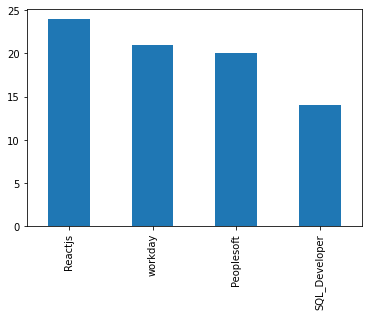

In [6]:
data.Catagory.value_counts().plot(kind="bar")

In [7]:
import spacy
import nltk

In [8]:
import re
import string

In [9]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('!', '',text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('⇨', '',text)
    text = re.sub(':', '',text)
    text = re.sub('•', '',text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[^a-zA-Z0-9]'," ",text)
    text = re.sub('\s+',' ',text)
    return text

In [11]:
data['Clean_Resumes'] = data['Resumes'].apply(lambda x: clean_text(x))
data

,Resumes,Catagory,Clean_Resumes
0,Name: Ravali P ...,Reactjs,name ravali p curriculum vitae specialization ...
1,SUSOVAN BAG Seeking a challenging posit...,Reactjs,susovan bag seeking a challenging position in ...
2,Kanumuru Deepak Reddy CAREER OBJECTIVE: To s...,Reactjs,kanumuru deepak reddy career objective to secu...
3,HARIPRIYA BATTINA Experience as UI Developer ...,Reactjs,haripriya battina experience as ui developer i...
4,KAMALAKAR REDDY. A Linked In: https://www.lin...,Reactjs,kamalakar reddy a linked in professional summa...
...,...,...,...
74,Name : Naresh Babu Cherukuri Objective: To tak...,workday,name naresh babu cherukuri objective to take u...
75,  3.3 years of IT experience as Workday HC...,workday,years of it experience as workday hcm technic...
76,Shireesh Balasani ...,workday,shireesh balasani hcm consultant profile summa...
77,Workday Integration Consultant Name :...,workday,workday integration consultant name sri krish...


In [12]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

In [14]:
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in my_stop_words])

In [15]:
data['Clean_Resumes'] = data['Clean_Resumes'].apply(lambda x: remove_stopwords(x))
data

,Resumes,Catagory,Clean_Resumes
0,Name: Ravali P ...,Reactjs,name ravali p curriculum vitae specialization ...
1,SUSOVAN BAG Seeking a challenging posit...,Reactjs,susovan bag seeking challenging position field...
2,Kanumuru Deepak Reddy CAREER OBJECTIVE: To s...,Reactjs,kanumuru deepak reddy career objective secure ...
3,HARIPRIYA BATTINA Experience as UI Developer ...,Reactjs,haripriya battina experience ui developer reac...
4,KAMALAKAR REDDY. A Linked In: https://www.lin...,Reactjs,kamalakar reddy linked professional summary ye...
...,...,...,...
74,Name : Naresh Babu Cherukuri Objective: To tak...,workday,name naresh babu cherukuri objective take resp...
75,  3.3 years of IT experience as Workday HC...,workday,years experience workday hcm technical consult...
76,Shireesh Balasani ...,workday,shireesh balasani hcm consultant profile summa...
77,Workday Integration Consultant Name :...,workday,workday integration consultant name sri krishn...


In [16]:
from nltk.stem import WordNetLemmatizer

In [17]:
from nltk.tokenize import word_tokenize

In [18]:
word_lemmatizer = WordNetLemmatizer()

In [19]:
data['lemmatized_text'] = data['Clean_Resumes'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in word_tokenize(x)]))
data

,Resumes,Catagory,Clean_Resumes,lemmatized_text
0,Name: Ravali P ...,Reactjs,name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...
1,SUSOVAN BAG Seeking a challenging posit...,Reactjs,susovan bag seeking challenging position field...,susovan bag seeking challenging position field...
2,Kanumuru Deepak Reddy CAREER OBJECTIVE: To s...,Reactjs,kanumuru deepak reddy career objective secure ...,kanumuru deepak reddy career objective secure ...
3,HARIPRIYA BATTINA Experience as UI Developer ...,Reactjs,haripriya battina experience ui developer reac...,haripriya battina experience ui developer reac...
4,KAMALAKAR REDDY. A Linked In: https://www.lin...,Reactjs,kamalakar reddy linked professional summary ye...,kamalakar reddy linked professional summary ye...
...,...,...,...,...
74,Name : Naresh Babu Cherukuri Objective: To tak...,workday,name naresh babu cherukuri objective take resp...,name naresh babu cherukuri objective take resp...
75,  3.3 years of IT experience as Workday HC...,workday,years experience workday hcm technical consult...,year experience workday hcm technical consulta...
76,Shireesh Balasani ...,workday,shireesh balasani hcm consultant profile summa...,shireesh balasani hcm consultant profile summa...
77,Workday Integration Consultant Name :...,workday,workday integration consultant name sri krishn...,workday integration consultant name sri krishn...


In [20]:
def lower(text):
    text = text.lower()
    return text

In [21]:
data["lemmatized_text"] = data["lemmatized_text"].apply(lambda x: lower(x))

In [22]:
data

,Resumes,Catagory,Clean_Resumes,lemmatized_text
0,Name: Ravali P ...,Reactjs,name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...
1,SUSOVAN BAG Seeking a challenging posit...,Reactjs,susovan bag seeking challenging position field...,susovan bag seeking challenging position field...
2,Kanumuru Deepak Reddy CAREER OBJECTIVE: To s...,Reactjs,kanumuru deepak reddy career objective secure ...,kanumuru deepak reddy career objective secure ...
3,HARIPRIYA BATTINA Experience as UI Developer ...,Reactjs,haripriya battina experience ui developer reac...,haripriya battina experience ui developer reac...
4,KAMALAKAR REDDY. A Linked In: https://www.lin...,Reactjs,kamalakar reddy linked professional summary ye...,kamalakar reddy linked professional summary ye...
...,...,...,...,...
74,Name : Naresh Babu Cherukuri Objective: To tak...,workday,name naresh babu cherukuri objective take resp...,name naresh babu cherukuri objective take resp...
75,  3.3 years of IT experience as Workday HC...,workday,years experience workday hcm technical consult...,year experience workday hcm technical consulta...
76,Shireesh Balasani ...,workday,shireesh balasani hcm consultant profile summa...,shireesh balasani hcm consultant profile summa...
77,Workday Integration Consultant Name :...,workday,workday integration consultant name sri krishn...,workday integration consultant name sri krishn...


In [23]:
nltk.word_tokenize("rohit is a good guy")

['rohit', 'is', 'a', 'good', 'guy']

In [24]:
Sentences = data['lemmatized_text'].values
cleanedSentences = ""
for i in range(0,79):
    cleanedSentences += Sentences[i]
    requiredWords = nltk.word_tokenize(cleanedSentences)
    

In [25]:
len(cleanedSentences)

320302

In [26]:
len(requiredWords)

40112

In [27]:
wordfreqdist = nltk.FreqDist(requiredWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 600), ('application', 529), ('server', 500), ('report', 471), ('peoplesoft', 438), ('workday', 423), ('using', 391), ('integration', 368), ('project', 360), ('data', 331), ('database', 300), ('process', 289), ('system', 280), ('business', 271), ('web', 240), ('tool', 239), ('sql', 232), ('client', 220), ('worked', 220), ('role', 210), ('knowledge', 208), ('service', 204), ('environment', 201), ('requirement', 199), ('involved', 188), ('team', 185), ('skill', 183), ('support', 178), ('like', 178), ('hcm', 173), ('technology', 171), ('good', 169), ('creating', 163), ('development', 162), ('working', 161), ('design', 160), ('people', 160), ('technical', 153), ('responsibility', 152), ('user', 152), ('testing', 150), ('created', 149), ('developer', 146), ('various', 146), ('change', 145), ('domain', 144), ('issue', 139), ('eib', 137), ('security', 134), ('management', 132)]


In [28]:
from wordcloud import WordCloud

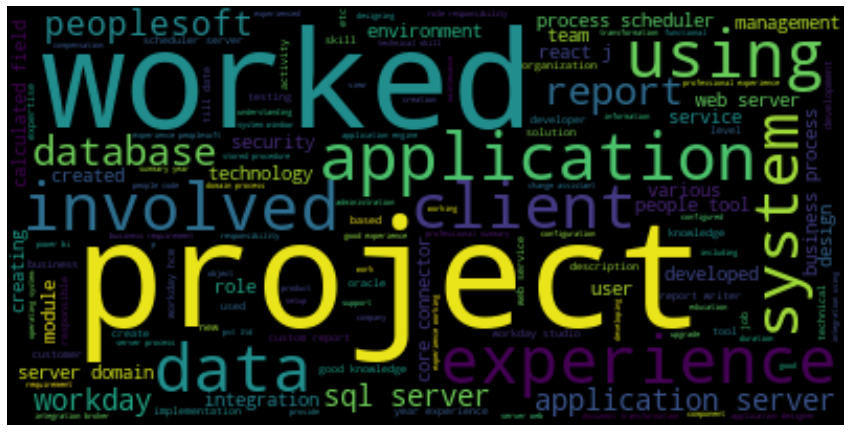

In [29]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

[('react', 115), ('j', 101), ('experience', 97), ('project', 92), ('using', 84), ('web', 72), ('application', 71), ('technology', 66), ('developer', 65), ('javascript', 64), ('knowledge', 61), ('skill', 57), ('e', 56), ('html', 51), ('n', 49), ('design', 49), ('good', 47), ('ui', 47), ('team', 44), ('used', 43), ('work', 42), ('bootstrap', 42), ('system', 40), ('development', 39), ('component', 39), ('working', 38), ('service', 35), ('reactjs', 34), ('responsibility', 33), ('year', 32), ('role', 32), ('cs', 31), ('website', 28), ('software', 27), ('designing', 26), ('responsible', 26), ('professional', 25), ('code', 25), ('page', 25), ('developing', 24), ('engineering', 24), ('jquery', 24), ('technical', 23), ('management', 23), ('redux', 23), ('testing', 22), ('date', 22), ('college', 21), ('client', 21), ('worked', 21)]


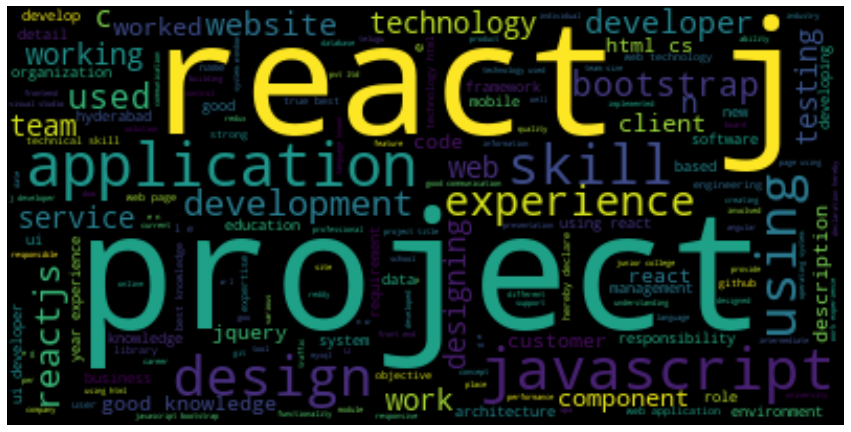

In [30]:
reactjs_sentences = data[data["Catagory"]=="Reactjs"]["lemmatized_text"].values
cleanedSentences = ""
for i in range(0,23):
    cleanedSentences += reactjs_sentences[i]
    requiredWords = nltk.word_tokenize(cleanedSentences)
    
wordfreqdist = nltk.FreqDist(requiredWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

[('workday', 423), ('integration', 291), ('report', 277), ('business', 186), ('experience', 168), ('using', 147), ('eib', 137), ('process', 124), ('system', 119), ('core', 113), ('hcm', 112), ('worked', 110), ('connector', 109), ('requirement', 107), ('studio', 107), ('field', 101), ('custom', 98), ('data', 97), ('security', 93), ('client', 89), ('created', 89), ('document', 87), ('support', 82), ('consultant', 80), ('testing', 80), ('service', 79), ('project', 78), ('calculated', 75), ('involved', 72), ('xslt', 72), ('change', 70), ('knowledge', 69), ('like', 68), ('team', 66), ('creating', 66), ('xml', 65), ('role', 64), ('good', 62), ('working', 61), ('design', 60), ('developed', 60), ('compensation', 59), ('technical', 58), ('skill', 57), ('new', 57), ('issue', 57), ('inbound', 56), ('functional', 56), ('tool', 55), ('transformation', 55)]


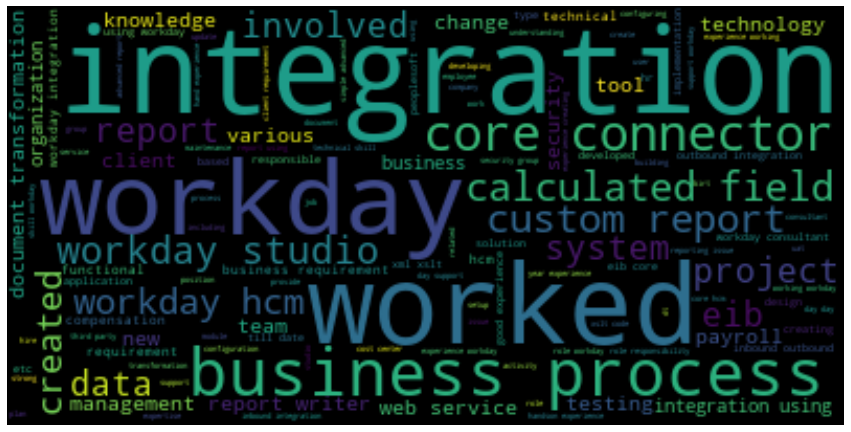

In [31]:
workday_sentences = data[data["Catagory"]=="workday"]["lemmatized_text"].values
cleanedSentences = ""
for i in range(21):
    cleanedSentences += workday_sentences[i]
    requiredWords = nltk.word_tokenize(cleanedSentences)
    
wordfreqdist = nltk.FreqDist(requiredWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

[('sql', 182), ('data', 122), ('server', 104), ('experience', 103), ('using', 82), ('report', 79), ('table', 75), ('database', 72), ('query', 62), ('function', 61), ('project', 56), ('procedure', 44), ('business', 43), ('service', 43), ('bi', 42), ('system', 41), ('knowledge', 41), ('developer', 37), ('tool', 37), ('view', 37), ('good', 37), ('role', 37), ('stored', 36), ('index', 36), ('requirement', 36), ('like', 34), ('power', 34), ('user', 33), ('ssis', 32), ('development', 32), ('application', 32), ('creating', 31), ('join', 31), ('client', 31), ('date', 30), ('developed', 30), ('design', 30), ('trigger', 29), ('task', 28), ('package', 27), ('skill', 27), ('technology', 27), ('information', 26), ('technical', 24), ('various', 23), ('professional', 23), ('working', 23), ('etl', 22), ('created', 22), ('m', 21)]


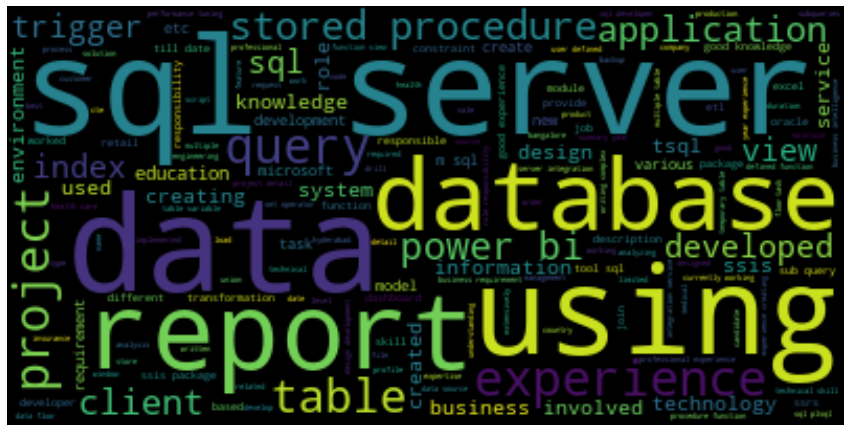

In [32]:
workday_sentences = data[data["Catagory"]=="SQL_Developer"]["lemmatized_text"].values
cleanedSentences = ""
for i in range(14):
    cleanedSentences += workday_sentences[i]
    requiredWords = nltk.word_tokenize(cleanedSentences)
    
wordfreqdist = nltk.FreqDist(requiredWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

[('peoplesoft', 410), ('server', 388), ('application', 377), ('experience', 228), ('database', 204), ('process', 151), ('environment', 140), ('tool', 136), ('people', 133), ('project', 130), ('domain', 121), ('web', 113), ('oracle', 111), ('report', 111), ('scheduler', 106), ('data', 93), ('support', 84), ('system', 79), ('production', 78), ('involved', 78), ('client', 77), ('using', 76), ('role', 75), ('migration', 75), ('worked', 75), ('issue', 72), ('window', 71), ('change', 68), ('fscm', 67), ('update', 65), ('patch', 63), ('hcm', 61), ('various', 61), ('like', 58), ('user', 58), ('integration', 57), ('creating', 56), ('team', 55), ('pum', 55), ('upgrade', 55), ('configuration', 55), ('troubleshooting', 54), ('setup', 54), ('file', 53), ('peopletools', 52), ('development', 52), ('instance', 52), ('applying', 51), ('responsibility', 51), ('tuxedo', 50)]


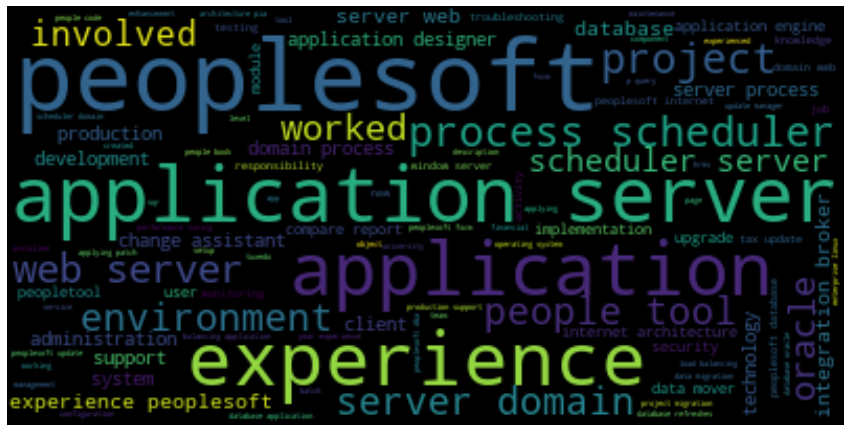

In [33]:
workday_sentences = data[data["Catagory"]=="Peoplesoft"]["lemmatized_text"].values
cleanedSentences = ""
for i in range(20):
    cleanedSentences += workday_sentences[i]
    requiredWords = nltk.word_tokenize(cleanedSentences)
    
wordfreqdist = nltk.FreqDist(requiredWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
categories = np.sort(data['Catagory'].unique())
categories

array(['Peoplesoft', 'Reactjs', 'SQL_Developer', 'workday'], dtype=object)

In [39]:
data_categories = [data[data['Catagory'] == category].loc[:, ['lemmatized_text', 'Catagory']] for category in categories]
data_categories

[                                      lemmatized_text    Catagory
 24  anubhav kumar singh core competency scripting ...  Peoplesoft
 25  classification internal classification interna...  Peoplesoft
 26  sirazuddin bangalore india sirazuddin bangalor...  Peoplesoft
 27  peoplesoft admin varkala vikas career objectiv...  Peoplesoft
 28  peoplesoft administration vivekanand sayana ca...  Peoplesoft
 29  hari narayana professional summary year experi...  Peoplesoft
 30  murali professional summary year experience pe...  Peoplesoft
 31  priyabrata hota career objective pursuing peop...  Peoplesoft
 32  tanna sujatha objective seeking challenging ro...  Peoplesoft
 33  c n c address manyata tech park nagavara banga...  Peoplesoft
 34  profile summary year experience implementing u...  Peoplesoft
 35  peoplesoft database administrator gangareddy p...  Peoplesoft
 36  priyanka ramadoss mountpleasant coonoor nilgir...  Peoplesoft
 37  peoplesoft administrator srinivask experience ...  People

In [36]:
def wordcloud(df):
    txt = nltk.word_tokenize(data_categories["lemmatized_text"].values)
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

In [37]:
data_categories[0]["lemmatized_text"].values

array(['anubhav kumar singh core competency scripting shell scripting application peoplesoft hcm financials operating system linux window webapp server weblogic tuxedo rdbms oracle repository github core competency scripting shell scripting application peoplesoft hcm financials operating system linux window webapp server weblogic tuxedo rdbms oracle repository github work globally competitive environment challenging assignment shall yield twin benefit job satisfaction steadypaced professional growth professional experience current hcl current role system admin offshore skill shell scripting linux peoplesoft administration github managing peoplesoft hcm peoplesoft fscm production environment along support environment installed linux window o involved day day activity project migration database refresh system admin change tax update etc troubleshooting various server like application server web server process scheduler server applying tuxedo weblogic middleware cpu patch various applicat

In [38]:
data_categories[3]

,lemmatized_text,Catagory
58,chinna subbarayudu dob march nationality india...,workday
59,name gopi krishna reddy professional summery w...,workday
60,g himaja career objective work towards achievi...,workday
61,jyoti verma professional summary professional ...,workday
62,mooraboyina guravaiah workday integration spec...,workday
63,venkata saikrishna workday consultant profssio...,workday
64,workday hcm techno functional consultant rahul...,workday
65,ramesh workday hcm consultant professional sum...,workday
66,srikanth workday hcm consultant seeking suitab...,workday
67,workday hcm fcm name kumar s role workday cons...,workday


In [100]:
for i, category in enumerate(categories):
    print(data_categories[i])

                                      lemmatized_text    Catagory
24  anubhav kumar singh core competency scripting ...  Peoplesoft
25  classification internal classification interna...  Peoplesoft
26  sirazuddin bangalore india sirazuddin bangalor...  Peoplesoft
27  peoplesoft admin varkala vikas career objectiv...  Peoplesoft
28  peoplesoft administration vivekanand sayana ca...  Peoplesoft
29  hari narayana professional summary year experi...  Peoplesoft
30  murali professional summary year experience pe...  Peoplesoft
31  priyabrata hota career objective pursuing peop...  Peoplesoft
32  tanna sujatha objective seeking challenging ro...  Peoplesoft
33  c n c address manyata tech park nagavara banga...  Peoplesoft
34  profile summary year experience implementing u...  Peoplesoft
35  peoplesoft database administrator gangareddy p...  Peoplesoft
36  priyanka ramadoss mountpleasant coonoor nilgir...  Peoplesoft
37  peoplesoft administrator srinivask experience ...  Peoplesoft
38  vinod 

In [101]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(PLOT_PALETTE)
%matplotlib inline
plt.figure(figsize=(40, 28))

for i, category in enumerate(categories):
    wc =  wordcloud(data_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

TypeError: list indices must be integers or slices, not str

<Figure size 2880x2016 with 0 Axes>

In [102]:
#nlp = spacy.load("en_core_web_sm")

In [103]:
#def tokenization(x):
    doc = nlp(x)
    tokens = [tok for tok in doc]
    return tokens

In [104]:
#data['tokenized'] = data['lemmatized_text'].apply(lambda x: tokenization(x))

,Resumes,Catagory,Clean_Resumes,lemmatized_text,tokenized
0,Name: Ravali P ...,Reactjs,name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...,"[name, ravali, p, curriculum, vitae, specializ..."
1,SUSOVAN BAG Seeking a challenging posit...,Reactjs,susovan bag seeking challenging position field...,susovan bag seeking challenging position field...,"[susovan, bag, seeking, challenging, position,..."
2,Kanumuru Deepak Reddy CAREER OBJECTIVE: To s...,Reactjs,kanumuru deepak reddy career objective secure ...,kanumuru deepak reddy career objective secure ...,"[kanumuru, deepak, reddy, career, objective, s..."
3,HARIPRIYA BATTINA Experience as UI Developer ...,Reactjs,haripriya battina experience ui developer reac...,haripriya battina experience ui developer reac...,"[haripriya, battina, experience, ui, developer..."
4,KAMALAKAR REDDY. A Linked In: https://www.lin...,Reactjs,kamalakar reddy linked professional summary ye...,kamalakar reddy linked professional summary ye...,"[kamalakar, reddy, linked, professional, summa..."
...,...,...,...,...,...
74,Name : Naresh Babu Cherukuri Objective: To tak...,workday,name naresh babu cherukuri objective take resp...,name naresh babu cherukuri objective take resp...,"[name, naresh, babu, cherukuri, objective, tak..."
75,  3.3 years of IT experience as Workday HC...,workday,years experience workday hcm technical consult...,year experience workday hcm technical consulta...,"[year, experience, workday, hcm, technical, co..."
76,Shireesh Balasani ...,workday,shireesh balasani hcm consultant profile summa...,shireesh balasani hcm consultant profile summa...,"[shireesh, balasani, hcm, consultant, profile,..."
77,Workday Integration Consultant Name :...,workday,workday integration consultant name sri krishn...,workday integration consultant name sri krishn...,"[workday, integration, consultant, name, sri, ..."


In [40]:
data

,Resumes,Catagory,Clean_Resumes,lemmatized_text
0,Name: Ravali P ...,Reactjs,name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...
1,SUSOVAN BAG Seeking a challenging posit...,Reactjs,susovan bag seeking challenging position field...,susovan bag seeking challenging position field...
2,Kanumuru Deepak Reddy CAREER OBJECTIVE: To s...,Reactjs,kanumuru deepak reddy career objective secure ...,kanumuru deepak reddy career objective secure ...
3,HARIPRIYA BATTINA Experience as UI Developer ...,Reactjs,haripriya battina experience ui developer reac...,haripriya battina experience ui developer reac...
4,KAMALAKAR REDDY. A Linked In: https://www.lin...,Reactjs,kamalakar reddy linked professional summary ye...,kamalakar reddy linked professional summary ye...
...,...,...,...,...
74,Name : Naresh Babu Cherukuri Objective: To tak...,workday,name naresh babu cherukuri objective take resp...,name naresh babu cherukuri objective take resp...
75,  3.3 years of IT experience as Workday HC...,workday,years experience workday hcm technical consult...,year experience workday hcm technical consulta...
76,Shireesh Balasani ...,workday,shireesh balasani hcm consultant profile summa...,shireesh balasani hcm consultant profile summa...
77,Workday Integration Consultant Name :...,workday,workday integration consultant name sri krishn...,workday integration consultant name sri krishn...


In [41]:
df=data[["lemmatized_text","Catagory"]]
df

,lemmatized_text,Catagory
0,name ravali p curriculum vitae specialization ...,Reactjs
1,susovan bag seeking challenging position field...,Reactjs
2,kanumuru deepak reddy career objective secure ...,Reactjs
3,haripriya battina experience ui developer reac...,Reactjs
4,kamalakar reddy linked professional summary ye...,Reactjs
...,...,...
74,name naresh babu cherukuri objective take resp...,workday
75,year experience workday hcm technical consulta...,workday
76,shireesh balasani hcm consultant profile summa...,workday
77,workday integration consultant name sri krishn...,workday


In [42]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le=LabelEncoder()

In [61]:
df["label_encoder"]=le.fit_transform(df.Catagory)

C:\Users\Dell\AppData\Local\Temp\ipykernel_22040\4186484618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label_encoder"]=le.fit_transform(df.Catagory)


In [66]:
le.classes_

array(['Peoplesoft', 'Reactjs', 'SQL_Developer', 'workday'], dtype=object)

In [44]:
df

,lemmatized_text,Catagory,label_encoder
0,name ravali p curriculum vitae specialization ...,Reactjs,1
1,susovan bag seeking challenging position field...,Reactjs,1
2,kanumuru deepak reddy career objective secure ...,Reactjs,1
3,haripriya battina experience ui developer reac...,Reactjs,1
4,kamalakar reddy linked professional summary ye...,Reactjs,1
...,...,...,...
74,name naresh babu cherukuri objective take resp...,workday,3
75,year experience workday hcm technical consulta...,workday,3
76,shireesh balasani hcm consultant profile summa...,workday,3
77,workday integration consultant name sri krishn...,workday,3


In [45]:
x = df['lemmatized_text'].values
y = df['label_encoder'].values

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
word_vectorizer = TfidfVectorizer(lowercase= True, sublinear_tf=True, stop_words='english')
word_vectorizer.fit(x)
WordFeatures = word_vectorizer.transform(x)

In [68]:
WordFeatures.shape

(79, 4223)

In [69]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,y,test_size=0.2,random_state=0,stratify=y)

In [76]:
X_train.shape,X_test.shape

((63, 4223), (16, 4223))

## Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression

In [78]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [80]:
predict1 = lg.predict(X_test)
predict1

array([3, 1, 3, 2, 0, 1, 0, 0, 1, 1, 3, 1, 0, 2, 2, 3])

In [82]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report

In [83]:
accuracy_1 = accuracy_score(y_test,predict1)
accuracy_1

1.0

<AxesSubplot:>

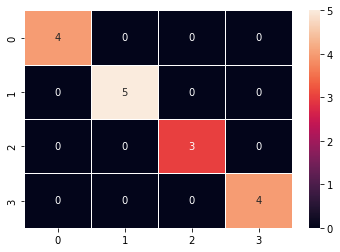

In [93]:
sns.heatmap(confusion_matrix(y_test,predict1),annot=True,linewidths=1)

In [87]:
print(classification_report(y_test,predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [95]:
from sklearn.svm import SVC

In [96]:
sv = SVC()
sv.fit(X_train,y_train)
predict2 = sv.predict(X_test)

In [101]:
accuracy_2 = accuracy_score(y_test,predict2)
accuracy_2

0.9375

In [102]:
cm2 = confusion_matrix(y_test,predict2)

<AxesSubplot:>

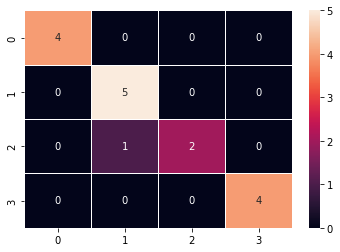

In [103]:
sns.heatmap(cm2,annot=True,linewidths=1)

In [104]:
print(classification_report(y_test,predict2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      1.00      0.91         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.92      0.93        16
weighted avg       0.95      0.94      0.93        16



In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predict3=rf.predict(X_test)

In [107]:
accuracy_3 = accuracy_score(y_test,predict3)
accuracy_3

1.0

<AxesSubplot:>

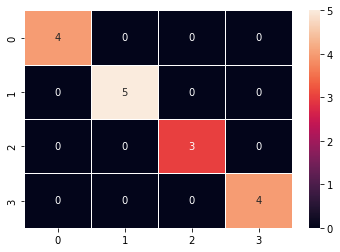

In [108]:
cm3 = confusion_matrix(y_test,predict3)
sns.heatmap(cm3,annot=True,linewidths=1)

In [109]:
print(classification_report(y_test,predict3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [110]:
from sklearn.naive_bayes import MultinomialNB

In [111]:
nb=MultinomialNB()
nb.fit(X_train,y_train)
predict4=nb.predict(X_test)

In [112]:
accuracy_4 = accuracy_score(y_test,predict4)
accuracy_4

0.9375

<AxesSubplot:>

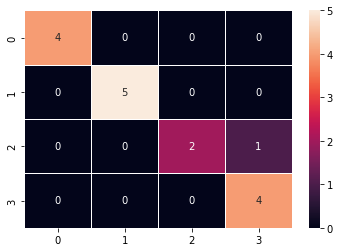

In [113]:
cm4 = confusion_matrix(y_test,predict4)
sns.heatmap(cm4,annot=True,linewidths=1)

In [114]:
print(classification_report(y_test,predict4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      0.67      0.80         3
           3       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.95      0.92      0.92        16
weighted avg       0.95      0.94      0.93        16



In [116]:
!pip install lightgbm


     ---------------------------------------- 1.0/1.0 MB 7.2 MB/s eta 0:00:00


In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [118]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
predict5=dt.predict(X_test)

In [119]:
accuracy_5 = accuracy_score(y_test,predict5)
accuracy_5

0.9375

<AxesSubplot:>

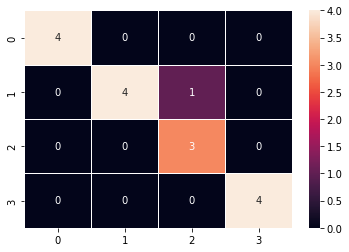

In [120]:
cm5 = confusion_matrix(y_test,predict5)
sns.heatmap(cm5,annot=True,linewidths=1)

In [121]:
print(classification_report(y_test,predict5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.80      0.89         5
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.94      0.95      0.94        16
weighted avg       0.95      0.94      0.94        16



In [122]:
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)
predict6=ab.predict(X_test)

In [123]:
accuracy_6 = accuracy_score(y_test,predict6)
accuracy_6

0.75

<AxesSubplot:>

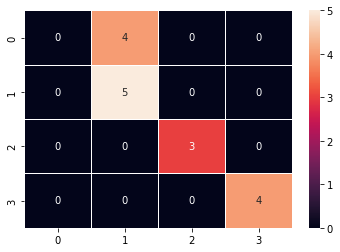

In [124]:
cm6 = confusion_matrix(y_test,predict6)
sns.heatmap(cm6,annot=True,linewidths=1)

In [125]:
print(classification_report(y_test,predict6))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.56      1.00      0.71         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.75        16
   macro avg       0.64      0.75      0.68        16
weighted avg       0.61      0.75      0.66        16



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
gd = GradientBoostingClassifier()
gd.fit(X_train,y_train)
predict7 = gd.predict(X_test)

In [127]:
accuracy_7 = accuracy_score(y_test,predict7)
accuracy_7

1.0

<AxesSubplot:>

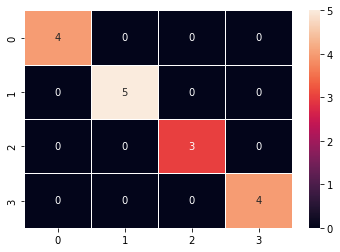

In [128]:
cm7 = confusion_matrix(y_test,predict7)
sns.heatmap(cm7,annot=True,linewidths=1)

In [129]:
print(classification_report(y_test,predict7))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [130]:
xg = XGBClassifier()
xg.fit(X_train,y_train)
predict8 = xg.predict(X_test)

In [131]:
accuracy_8 = accuracy_score(y_test,predict8)
accuracy_8

1.0

<AxesSubplot:>

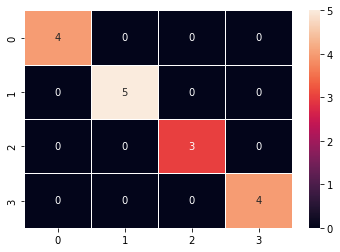

In [132]:
cm8 = confusion_matrix(y_test,predict8)
sns.heatmap(cm8,annot=True,linewidths=1)

In [133]:
print(classification_report(y_test,predict8))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [134]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)
predict9 = lgbm.predict(X_test)

In [135]:
accuracy_9 = accuracy_score(y_test,predict9)
accuracy_9

1.0

<AxesSubplot:>

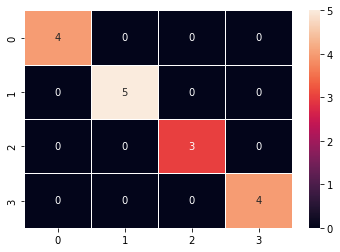

In [136]:
cm9 = confusion_matrix(y_test,predict9)
sns.heatmap(cm9,annot=True,linewidths=1)

In [141]:
table = {'Classifier' : ['Logistic Regression','SVM Classifier','Random Forest Classifier', 'Naive-Bayes Classifier','Decision Tree Classifier','AdaBoost Classifier', 'Gradient Boosting Classifier', 'Xtreme Gradient Boosting Classifier', 'Light Gradient Boosting Classifier'], 'Accuracy' : [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_7, accuracy_8, accuracy_9]} #'Precision Score' : [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_7, precision_8, precision_9], 'Recall Score' : [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_7, recall_8, recall_9], 'F1_Score' : [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_7, f1_8, f1_9]}
table = pd.DataFrame(table)
table.sort_values(["Accuracy"],inplace = True, ignore_index=True, ascending=False)
table

,Classifier,Accuracy
0,Logistic Regression,1.0000
1,Random Forest Classifier,1.0000
2,Gradient Boosting Classifier,1.0000
3,Xtreme Gradient Boosting Classifier,1.0000
4,Light Gradient Boosting Classifier,1.0000
5,SVM Classifier,0.9375
6,Naive-Bayes Classifier,0.9375
7,Decision Tree Classifier,0.9375
8,AdaBoost Classifier,0.7500


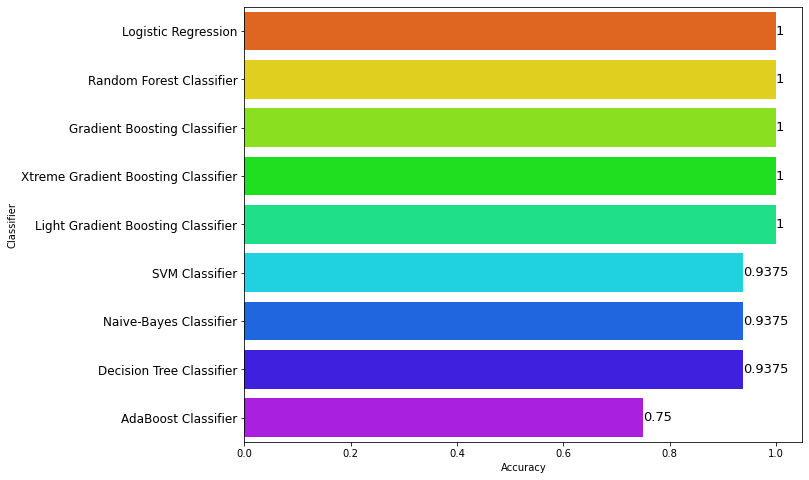

In [215]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data=table,x='Accuracy',y='Classifier', palette="gist_rainbow", ci=None)
plt.yticks(fontsize=12);
for i in ax.containers:
    ax.bar_label(i,fontsize=13)

In [204]:
import pickle

In [205]:
xgboost_model= xg.fit(X_train,y_train)

In [206]:
pickle.dump(xgboost_model, open("xgboost_model.pkl", 'wb')) #Saving the model

In [207]:
model = pickle.load(open("xgboost_model.pkl", 'rb')) #To load saved model from local directory

In [208]:
model.predict(X_test)

array([3, 1, 3, 2, 0, 1, 0, 0, 1, 1, 3, 1, 0, 2, 2, 3], dtype=int64)

In [217]:
data

,Resumes,Catagory,Clean_Resumes,lemmatized_text
0,Name: Ravali P ...,Reactjs,name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...
1,SUSOVAN BAG Seeking a challenging posit...,Reactjs,susovan bag seeking challenging position field...,susovan bag seeking challenging position field...
2,Kanumuru Deepak Reddy CAREER OBJECTIVE: To s...,Reactjs,kanumuru deepak reddy career objective secure ...,kanumuru deepak reddy career objective secure ...
3,HARIPRIYA BATTINA Experience as UI Developer ...,Reactjs,haripriya battina experience ui developer reac...,haripriya battina experience ui developer reac...
4,KAMALAKAR REDDY. A Linked In: https://www.lin...,Reactjs,kamalakar reddy linked professional summary ye...,kamalakar reddy linked professional summary ye...
...,...,...,...,...
74,Name : Naresh Babu Cherukuri Objective: To tak...,workday,name naresh babu cherukuri objective take resp...,name naresh babu cherukuri objective take resp...
75,  3.3 years of IT experience as Workday HC...,workday,years experience workday hcm technical consult...,year experience workday hcm technical consulta...
76,Shireesh Balasani ...,workday,shireesh balasani hcm consultant profile summa...,shireesh balasani hcm consultant profile summa...
77,Workday Integration Consultant Name :...,workday,workday integration consultant name sri krishn...,workday integration consultant name sri krishn...


In [216]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [218]:
def extract_skills(resume_text):

    nlp_text = nlp(resume_text)
    noun_chunks = nlp_text.noun_chunks

    # removing stop words and implementing word tokenization
    tokens = [token.text for token in nlp_text if not token.is_stop]
            
    # reading the csv file
    data = pd.read_csv("https://raw.githubusercontent.com/MoinDalvs/Resume_Classification/main/skills.csv") 
            
    # extract values
    skills = list(data.columns.values)
            
    skillset = []
            
    # check for one-grams (example: python)
    for token in tokens:
        if token.lower() in skills:
            skillset.append(token)
            
    # check for bi-grams and tri-grams (example: machine learning)
    for token in noun_chunks:
        token = token.text.lower().strip()
        if token in skills:
            skillset.append(token)
            
    return [i.capitalize() for i in set([i.lower() for i in skillset])]

In [229]:
data.columns.values

array(['Resumes', 'Catagory', 'Clean_Resumes', 'lemmatized_text'],
      dtype=object)

In [234]:
extract_skills(data["Resumes"][4])

['Ubuntu',
 'Html',
 'Javascript',
 'Analysis',
 'Technical',
 'English',
 'Visual',
 'Updates',
 'System',
 'Content',
 'Design',
 'Html5',
 'Jira',
 'Js',
 'Communication',
 'Photoshop',
 'Data collection',
 'Windows',
 'Ui',
 'Coding',
 'Agile',
 'Css']

In [245]:
word_vectorizer = TfidfVectorizer(lowercase= True, max_features=1500, sublinear_tf=True, stop_words='english')
word_vectorizer.fit(x)
WordFeatures = word_vectorizer.transform(x)

In [246]:
WordFeatures.shape

(79, 1500)

In [247]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,y,test_size=0.2,random_state=0,stratify=y)

In [248]:
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)
predict6=ab.predict(X_test)

In [249]:
accuracy_score(y_test,predict6)

0.75

In [250]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
predict5=dt.predict(X_test)

In [251]:
accuracy_score(y_test,predict5)

0.9375

In [252]:
nb=MultinomialNB()
nb.fit(X_train,y_train)
predict4=nb.predict(X_test)

In [253]:
accuracy_score(y_test,predict4)

1.0

In [254]:
sv = SVC()
sv.fit(X_train,y_train)
predict2 = sv.predict(X_test)

In [255]:
accuracy_score(y_test,predict2)

1.0

In [256]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predict3=rf.predict(X_test)

In [257]:
accuracy_score(y_test,predict3)

1.0

In [258]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)
predict9 = lgbm.predict(X_test)

In [259]:
accuracy_score(y_test,predict9)

1.0

In [260]:
xg = XGBClassifier()
xg.fit(X_train,y_train)
predict8 = xg.predict(X_test)

In [261]:
accuracy_score(y_test,predict8)

1.0

In [262]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
predict1 = lg.predict(X_test)

In [263]:
accuracy_score(y_test,predict1)

1.0